<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Check-in" data-toc-modified-id="Final-Project-Check-in-1">Final Project Check-in</a></span></li><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-2">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-3">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4">Load Data</a></span></li><li><span><a href="#Fit-scikit-learn-model" data-toc-modified-id="Fit-scikit-learn-model-5">Fit scikit-learn model</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6">Evaluation Metric</a></span></li></ul></div>

Final Project - Grace Hoppers
------

Group Name
-----

The Grace Hoppers 

Student Names
----

1. Akansha Shrivastava
2. Ivette Sulca
3. Bing Wang

### Preinstall requirements

pip install geonamescache

1) ASK:
----

- QUESTION: Can we predict the rating of a recipe?
- Source of the data: https://www.kaggle.com/hugodarwood/epirecipes
- Description of the dataset: Epicurious is a website for recipes.Each recipe may include a description, a list of ingredients, step by step directions, and a caloric breakdown

2) ACQUIRE
-----

In [1]:
from collections import Counter
import imblearn
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import imblearn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score 
from sklearn.metrics import precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import geonamescache  
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_pd = pd.read_csv('./data/epi_r.csv')
data_json = pd.read_json('./data/full_format_recipes.json',)

CSV FILE: Initially, there are approximately 20k recipes with 680 features, most of them categorical that indicates whether or not a recipe contains a ingredient.

In [3]:
data_pd.shape

(20052, 680)

In [4]:
data_pd.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


JSON FILE: Contains detailed description of cooking directions and ingredients. This information will be helpful to define new features.

In [5]:
data_json.shape

(20130, 11)

In [6]:
data_json.head(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


3) PROCESS
-----

We clean the data and create new features in this step.

In [7]:
# Deleting null predictive variables from the dataset
data_pd = data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]

# Deleting drinks
data_pd = data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]

# Deleting repeated titles
data_pd.drop_duplicates(subset=['title'], inplace=True)  

In [8]:
# Removing target, "rating", from data_pd
y = data_pd.iloc[:,1]
data_pd = pd.concat([data_pd.iloc[:,0], data_pd.iloc[:,2:]], axis=1)

In [9]:
# Creating feature: holidays: Dummy for world holiday 
# (a celebratory day attached to date in calendar-- birthday, graduation, anniversary, etc. not included)
holidays = ["bastille day", "christmas", "christmas eve", "cinco de mayo", "columbus", 
 "diwali", "easter", "father's day", "fourth of july", "friendsgiving", "halloween",
 "hanukkah", "kwanzaa", "labor day", "lunar new year", "mother's day", "new year's day",
 "new year's eve", "oktoberfest", "passover", "persian new year", "purim", "ramadan", 
 "rosh hashanah/yom kippur", "st. patrick's day", "sukkot", "thanksgiving", 
 "valentine's day"]

data_pd["holiday"] = np.where(data_pd[holidays].sum(axis=1)>0, 1, 0)

In [10]:
# Cleaning "Fat" column
# Deleting bigger portions(Paella) and outliers
y = y.loc[((data_pd.fat>=0) & (data_pd.fat<=200)) | (data_pd.fat.isna())]
data_pd = data_pd.loc[((data_pd.fat>=0) & (data_pd.fat<=200)) | (data_pd.fat.isna())]

# Imputing median to missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
fat_clean = imp.fit_transform(data_pd.fat.values.reshape(-1,1))
fat_clean = pd.DataFrame(data=fat_clean, columns=['fat_clean'])
data_pd['fat'] = fat_clean.fat_clean.values

In [11]:
# Cleaning "Protein" column
# Deleting bigger portions(Paella) and outliers
y = y.loc[((data_pd.protein>=0) & (data_pd.protein<=200)) | (data_pd.protein.isna())]
data_pd = data_pd.loc[((data_pd.protein>=0) & (data_pd.protein<=200)) | (data_pd.protein.isna())]

# Imputing median to missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
protein_clean = imp.fit_transform(data_pd.protein.values.reshape(-1,1))
protein_clean = pd.DataFrame(data=protein_clean ,columns=['protein_clean'])
data_pd['protein']=protein_clean.protein_clean.values


In [12]:
# Cleaning "Sodium" column
imp = SimpleImputer(missing_values=np.nan, strategy='median')
sodium_clean = imp.fit_transform(data_pd.sodium.values.reshape(-1,1))
sodium_clean = pd.DataFrame(data=sodium_clean ,columns=['sodium_clean'])
data_pd['sodium']=sodium_clean.sodium_clean.values

In [13]:
# Creating new feature "allhealthy"
# Filtering columns related to "healthy"
# Selecting all the relevant columns

selected = ["fat free", "healthy", "low cal", "quick and healthy", 
"low carb",
"low cholesterol",
"low fat",
"low sodium",
"low sugar",
"low/no sugar"]

# Filtering rows which have "selected" columns as 1 -> healthy
data_pd["allhealthy"] = 0
for col in selected:
    data_pd.loc[data_pd[col] == 1, "allhealthy"] = 1

In [14]:
# Cleaning "Calories" column

median = data_pd["calories"].median()
data_pd.loc[data_pd["calories"].isna(), "calories"] = median

In [15]:
# Creating new features that indicates complexity of the recipe from JSON file

data_json.drop_duplicates(subset=['title'],inplace=True)  
data_json['directions_n_characters']=data_json['directions'].astype(str).str.len()
data_json['ingredients_quantity']=data_json['ingredients'].str.len()
data_json['directions_n_steps']=data_json['directions'].astype(str).str.replace('[','').str.replace(']','').str.split("',").apply(lambda x: len(x))
data_json.loc[data_json.desc.isna(), "desc_n_characters"] = 0
data_json.loc[data_json.desc.notna(), "desc_n_characters"] = data_json["desc"].astype(str).str.len()

data_json2=data_json[['title','directions_n_characters','ingredients_quantity',
                      'directions_n_steps', 'desc_n_characters']]

data_pd=pd.merge(data_pd, data_json2, on='title', how="left")

In [16]:
# Cleaning new complexity features: imputing missing values by the median
imp = SimpleImputer(missing_values=np.nan, strategy='median')

directions_n_characters = imp.fit_transform(data_pd.directions_n_characters.values.reshape(-1,1))
directions_n_characters = pd.DataFrame(data=directions_n_characters ,columns=['directions_n_characters'])
data_pd['directions_n_characters']=directions_n_characters.directions_n_characters.values

ingredients_quantity = imp.fit_transform(data_pd.ingredients_quantity.values.reshape(-1,1))
ingredients_quantity = pd.DataFrame(data=ingredients_quantity ,columns=['ingredients_quantity'])
data_pd['ingredients_quantity']=ingredients_quantity.ingredients_quantity.values

directions_n_steps = imp.fit_transform(data_pd.directions_n_steps.values.reshape(-1,1))
directions_n_steps = pd.DataFrame(data=directions_n_steps ,columns=['directions_n_steps'])
data_pd['directions_n_steps']=directions_n_steps.directions_n_steps.values

desc_n_characters = imp.fit_transform(data_pd.desc_n_characters.values.reshape(-1,1))
desc_n_characters = pd.DataFrame(data=desc_n_characters ,columns=['desc_n_characters'])
data_pd['desc_n_characters']=desc_n_characters.desc_n_characters.values


In [17]:
# Creating feature "locations" that indicates if the recipe has an origin
column_names=np.array(data_pd.columns)
column_names=[c.strip().upper() for c in column_names]

gc = geonamescache.GeonamesCache()
countries = gc.get_countries_by_names()
cities = gc.get_cities()
states = gc.get_us_states()

dict_countries=dict()
for k,v in countries.items():
    dict_countries[k.upper()]=[v['geonameid'],v['iso'],v['iso3']]

dict_countries2=dict()
for k,v in countries.items():
    dict_countries2[v['iso'].upper()]=k.upper()

dict_cities=dict()
for k,v in cities.items():
    dict_cities[v['name'].upper()]=[v['geonameid'],v['countrycode']]

dict_states=dict()    
for k,v in states.items():
    dict_states[v['name'].upper()] = [v['geonameid'],v['code'], 'US' ]
    
locs=[]
for col in data_pd.columns:    
    if col.upper() in dict_countries:
        if col.upper() not in ['TURKEY']:
            locs.append(col)

    if col.upper() in dict_states:        
        locs.append(col)
 
    if col.upper() in dict_cities:     
        if col.upper() not in ['SPRING','ORANGE','WALNUT','LEEK','WEDDING','PLUM','TEQUILA','DATE','PAPAYA','MARSALA','SAKE','RYE','GOUDA','HOLIDAY']:
             locs.append(col)    

data_pd["locations"] = np.where(data_pd[locs].sum(axis=1)>0, 1, 0)
data_pd.drop(locs, axis=1, inplace=True)                

3) MODEL: Fit scikit-learn model
----

We use the entire independent variables to start the evaluation of a baseline model.

In [18]:
X = data_pd.drop("title", axis=1)

Business decision: We decided to build a classification model that predicts whether or not a recipe has a high rating from the users. For that, we construct a binary classification model and transform the initial y vector.

In [26]:
y_discrete = y.reset_index()[['rating']].copy()
y_discrete["new_rating"] = 0
y_discrete.loc[y_discrete.rating > 3.5, "new_rating"] = 1
y_discrete.head()

,rating,new_rating
0,2.500,0
1,4.375,1
2,3.750,1
3,5.000,1
4,3.125,0


In [27]:
y_discrete = y_discrete.drop("rating", axis = 1)
y_discrete.columns = ["rating"]

1    13489
0     1948
Name: rating, dtype: int64

First issue before training the data: minority class for lower ratings. We will apply SMOTE oversampling to later to reduce the bias of our model.

In [21]:
y_discrete["rating"].value_counts()

1    13489
0     1948
Name: new_rating, dtype: int64

### Train-Validation-Test Split

Strategy for train-test datasets: 3 datasets train (70%), validation(15%) and test(15%)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.15, stratify=y_discrete)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)

In [50]:
X_train.shape

(11152, 586)

In [51]:
y_train.shape

(11152, 1)

In [52]:
X_valid.shape

(1969, 586)

In [53]:
X_test.shape

(2316, 586)

### Oversampling

For the training dataset we will apply SMOTE oversampling in order to balance both higher and lower rating classes.

In [54]:
sm = imblearn.over_sampling.SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_sm, columns=X_train.columns)
y_train = pd.Series(y_train_sm)

/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# Results after balancing
print(y_train.value_counts())
print(len(y_train))

1    9745
0    9745
dtype: int64
19490


### Selection of a baseline model

- MODEL CANDIDATES: We decided to fit five classification models that we have studied in the current module that includes Logistic Regression, KNN, Naïve Bayes, SVC and Random Forest.
- METRIC: Our north star metric will be F1 weighted score.

In [56]:
#Creating pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                ('clf', LogisticRegression(penalty='l1', solver='liblinear',random_state=42))])

pipe_kn = Pipeline([('scl', StandardScaler()),
                ('clf', KNeighborsClassifier())])

pipe_nb = Pipeline([
                ('clf', GaussianNB())])

pipe_svc = Pipeline([('scl', StandardScaler()),
                ('clf', SVC(random_state=42))])

pipe_rc = Pipeline([
                ('clf', RandomForestClassifier(random_state=42))])

pipelines=[pipe_lr,pipe_kn,pipe_nb,pipe_svc,pipe_rc]

In [57]:
#Training 5 classification models
for pipe in pipelines:
    pipe.fit(X_train, y_train)

/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


With the pipeline results, we can see that the two winners are Random Forest and SVC with 0.82 and 0.81 of F1 score respectively

In [58]:
# Scores on validation set
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

list_scores = []
list_conf_matrix = []
for pipe in pipelines:
    y_pred = pipe.predict(X_valid)
    
    model_name=pipe.get_params()['clf'].__class__.__name__

    accuracy_s = accuracy_score(y_valid, y_pred)
    f1_score_w= f1_score(y_valid, y_pred, average='weighted')
    f1_score_m= f1_score(y_valid, y_pred, average='macro')    

    list_scores.append([model_name,accuracy_s,f1_score_w,f1_score_m])
    list_conf_matrix.append([model_name, confusion_matrix(y_valid, y_pred)])
    
    print(model_name)
    print(classification_report(y_valid, y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.18      0.53      0.27       249
           1       0.91      0.65      0.75      1720

    accuracy                           0.63      1969
   macro avg       0.54      0.59      0.51      1969
weighted avg       0.81      0.63      0.69      1969

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.14      0.45      0.21       249
           1       0.88      0.60      0.72      1720

    accuracy                           0.58      1969
   macro avg       0.51      0.53      0.46      1969
weighted avg       0.79      0.58      0.65      1969

GaussianNB
              precision    recall  f1-score   support

           0       0.15      0.73      0.25       249
           1       0.91      0.40      0.56      1720

    accuracy                           0.44      1969
   macro avg       0.53      0.57      0.40      1969
weighted avg       0.82

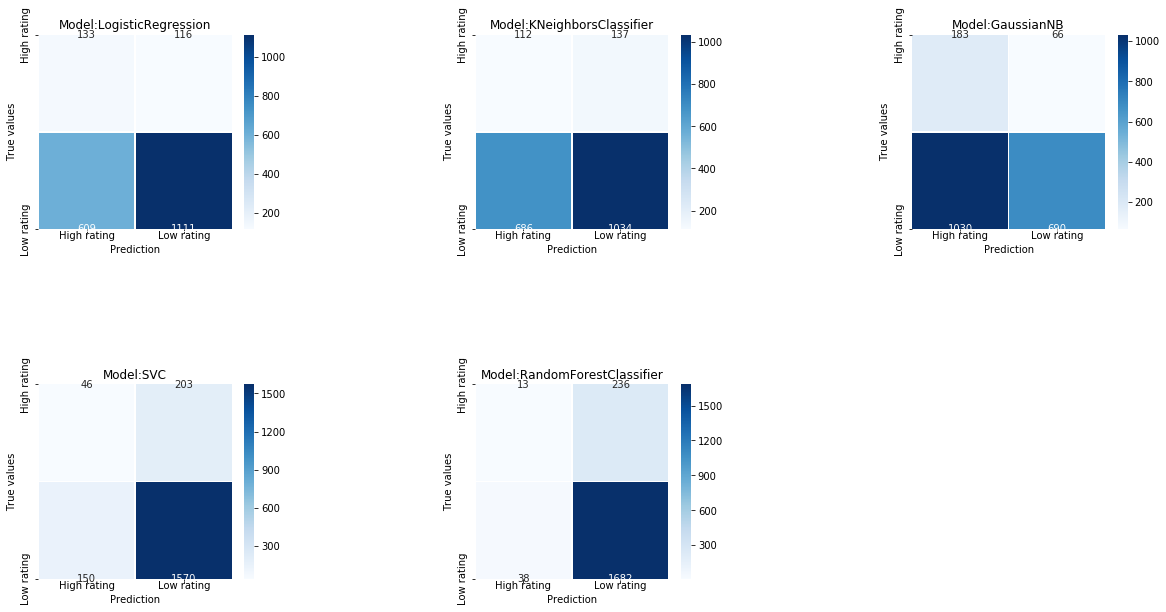

In [109]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i in range(0, 5):
    ax = fig.add_subplot(2, 3, i+1)
    sns.heatmap(list_conf_matrix[i][1],annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Blues")
    ax.set_ylabel('True values')
    ax.set_xlabel('Prediction')
    ax.set_title(f'Model:{list_conf_matrix[i][0]}')
    ax.xaxis.set_ticklabels(['High rating', 'Low rating'], va="center")
    ax.yaxis.set_ticklabels(['High rating', 'Low rating'],va="center")


### Baseline Model

Random forest based on F1 score. In addition, it also performs well on accuracy(confussion matrix) and can handle large datasets to find predictive features.

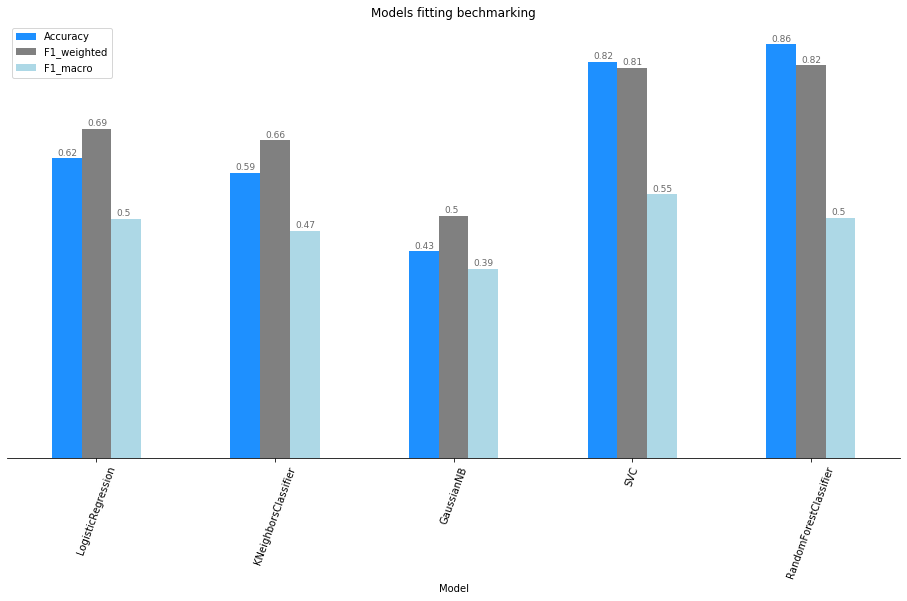

In [150]:
models_bench = pd.DataFrame(list_scores, columns = ['Model', 'Accuracy', 'F1_weighted', 'F1_macro'])
models_bench.set_index(["Model"], inplace=True)

ax = models_bench.plot(kind='bar', figsize=(16,8),color=['dodgerblue', 'grey','lightblue'], title='Models fitting bechmarking', rot=70)
ax.set_alpha(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+0.005, str(round((i.get_height()), 2)), fontsize=9, color='dimgrey')

### Tunning the model improving hyperparameters

Two potential models for the data are Random Forest classifier and Support Vector Classification. We will use Random Search CV to find better hyperparameters.

In [110]:
# Limit the number of folds and samples
cv=5
n_iter=5

# Defining estimators and search space
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(start=50, stop=200, num = 5)]

hyperparameters = dict(n_estimators=n_estimators,
                       #max_depth=max_depth,                           
                       min_samples_leaf=min_samples_leaf,                            
                       bootstrap=[True],
                       oob_score=[True]
                       )

clf_random_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                          hyperparameters, 
                          cv=cv, 
                          n_iter=n_iter,       
                          scoring='f1_weighted')


In [111]:
clf_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [112]:
clf_random_cv.best_params_

{'oob_score': True,
 'n_estimators': 132,
 'min_samples_leaf': 50,
 'bootstrap': True}

The F1 score on the validation set is approximately still the same even after the tuning. In fact, the OOB are not reducing after n_trees=50. This will be then our final model

In [113]:
y_pred = clf_random_cv.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.87      1.00      0.93      1720

    accuracy                           0.87      1969
   macro avg       0.44      0.50      0.47      1969
weighted avg       0.76      0.87      0.81      1969



In addition, we plot the F1 score vs. the number of tree estimators to check if the score can still be improved.

In [144]:
list_n_estimators = [1, 10, 20,50,100,200,400, 800]
list_oob_scores = []
list_f1_scores = []
for i in list_n_estimators:
    clf= RandomForestClassifier(n_estimators=i,oob_score=True,random_state=42)
    clf.fit(X_train, y_train)
    y_pred_val=clf.predict(X_valid)
    list_f1_scores.append(f1_score(y_valid, y_pred_val, average='weighted'))

/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/ivettesulca/anaconda3/envs/ml/lib/python3.7/

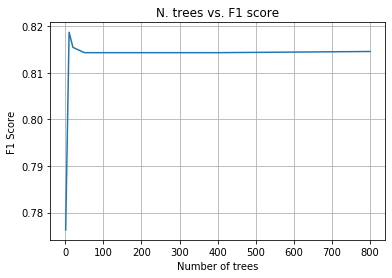

In [143]:
fig, ax = plt.subplots()
ax.plot(list_n_estimators, list_f1_scores)
ax.set(xlabel='Number of trees', ylabel='F1 Score',
       title='N. trees vs. F1 score')
ax.grid()

plt.show()

### Feature Importance

4) DELIVER:
----

Finally, we use the test set to validate how our model would perform with unknown data. 

In [147]:
y_pred = clf_random_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       292
           1       0.87      1.00      0.93      2024

    accuracy                           0.87      2316
   macro avg       0.44      0.50      0.47      2316
weighted avg       0.76      0.87      0.81      2316



In [146]:
print(confusion_matrix(y_test, y_pred))

[[   0  292]
 [   4 2020]]
